# Using Twitter to Predict National Flu Outbreaks

In [158]:
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import string 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TweetTokenizer, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
tqdm.pandas(desc="progress-bar")
from pandas.tools.plotting import lag_plot, autocorrelation_plot
from pandas import concat
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import statsmodels.api as sm  
import itertools
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils
from tqdm import tqdm
from gensim.models.phrases import Phrases, Phraser

In [159]:
#import annotated data
df = pd.read_csv('annotated_tweets.csv', engine='python')
df = df.drop('Unnamed: 0', axis=1)

# Natural Language Processing

In [160]:
def tokenize(tweet):
    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)
    return tknzr.tokenize(tweet)

def classifiers(x_train, y_train):
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    log = LogisticRegression()
    log.fit(x_train, y_train)
    forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
    forest.fit(x_train, y_train)
    gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01)
    gradboost.fit(x_train, y_train)
    adaboost = AdaBoostClassifier(n_estimators=100)
    adaboost.fit(x_train, y_train)
    svm = SVC(kernel='linear', probability=True)
    svm.fit(x_train, y_train)
    return [nb, log, forest, gradboost, adaboost, svm]

def classifier_performance(vectorizer, train_data, test_data, y_test):
    accuracy_df = []
    x_train = vectorizer.fit_transform(train_data)
    x_test = vectorizer.transform(test_data)
    #instantiate classifier objects
    classifier_list = classifiers(x_train, y_train)
    #display accuracy dataframe
    for classifier in classifier_list:
        preds = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, preds)
        accuracy_df.append(accuracy*100)
    accuracy_df = pd.DataFrame(accuracy_df)
    classifiers_key = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Gradient Boost', 'Adaboost',
                      'Support Vector Machine']
    accuracy_df['Model']=classifiers_key
    accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)
    fin_accuracy_df = accuracy_df[['Model', 'Accuracy']]
    return fin_accuracy_df

In [161]:
data = df['text']
labels = df['status']
train_data, test_data, y_train, y_test = train_test_split(data, labels)
tfidfvec = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
tfidfvec2 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2))
tfidfvec3 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,3))
countvec = CountVectorizer(stop_words='english', tokenizer=tokenize)
countvec2 = CountVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2))
countvec3 = CountVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,3))

## Count Vectorization

**Unigram**

In [5]:
classifier_performance(countvec, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,71.889401
1,Logistic Regression,70.322581
2,Random Forest,57.050691
3,Gradient Boost,62.672811
4,Adaboost,70.230415
5,Support Vector Machine,67.465438


**Bigram**

In [6]:
classifier_performance(countvec2, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.442396
1,Logistic Regression,71.520737
2,Random Forest,56.589862
3,Gradient Boost,62.027650
4,Adaboost,70.599078
5,Support Vector Machine,70.599078


**Trigram**

In [7]:
classifier_performance(countvec3, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.350230
1,Logistic Regression,71.889401
2,Random Forest,56.589862
3,Gradient Boost,61.935484
4,Adaboost,70.138249
5,Support Vector Machine,70.138249


## TF-IDF Vectorization

**Unigram**

In [8]:
classifier_performance(tfidfvec, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.073733
1,Logistic Regression,70.875576
2,Random Forest,57.142857
3,Gradient Boost,61.658986
4,Adaboost,69.400922
5,Support Vector Machine,69.677419


**Bigram**

In [9]:
classifier_performance(tfidfvec2, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,71.889401
1,Logistic Regression,71.428571
2,Random Forest,56.682028
3,Gradient Boost,62.119816
4,Adaboost,68.847926
5,Support Vector Machine,71.797235


**Trigram**

In [10]:
classifier_performance(tfidfvec3, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.165899
1,Logistic Regression,70.414747
2,Random Forest,56.589862
3,Gradient Boost,62.211982
4,Adaboost,68.571429
5,Support Vector Machine,72.073733


## Doc2Vec

“every paragraph is mapped to a unique vector, represented by a column in matrix D and every word is also mapped to a unique vector, represented by a column in matrix W. The paragraph vector and word vectors are averaged or concatenated to predict the next word in a context…The paragraph token can be thought of as another word. It acts as a memory that remembers what is missing from the current context — or the topic of the paragraph.”

In [78]:
data = df['text']
labels = df['status']
train_data, test_data, y_train, y_test = train_test_split(data, labels)

In [79]:
#the doc2vec training is completely unsupervised and thus there is no need to hold out any data, as it is unlabelled. 
#labelise each tweet with unique IDs using Gensim’s LabeledSentence function.
def labelize_tweets(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = df['text']
all_x_w2v = labelize_tweets(all_x, 'all')

### DBOW (Distributed Bag Of Words)

This is the Doc2Vec model analogous to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

In [80]:
cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs

train_vecs_dbow = get_vectors(model_dbow, train_data, 100)
validation_vecs_dbow = get_vectors(model_dbow, test_data, 100)

100%|██████████| 4337/4337 [00:00<00:00, 1368133.01it/s]


In [82]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)
clf.score(validation_vecs_dbow, y_test)

0.7152073732718894

In [ ]:
model_dbow.save('doc2vec_dbow.doc2vec')

In [ ]:
model_dbow = Doc2Vec.load('doc2vec_dbow.doc2vec')

In [ ]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMC (Distributed Memory Concatenation)

This is the Doc2Vec model analogous to CBOW model in Word2vec. The paragraph vectors are obtained by training a neural network on the task of inferring a center word based on context words and a context paragraph.

Note: dm defines the training algorithm. If dm=1 means ‘distributed memory’ (PV-DM) and dm=0 means ‘distributed bag of words’ (PV-DBOW). Distributed Memory model preserves the word order in a document whereas Distributed Bag of words just uses the bag of words approach, which doesn’t preserve any word order.

In [87]:
model_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_dmc.alpha -= 0.002
    model_dmc.min_alpha = model_dmc.alpha
   
train_vecs_dmc = get_vectors(model_dmc, train_data, 100)
validation_vecs_dmc = get_vectors(model_dmc, test_data, 100)

100%|██████████| 4337/4337 [00:00<00:00, 1873398.19it/s]


In [88]:
clf = LogisticRegression()
clf.fit(train_vecs_dmc, y_train)
clf.score(validation_vecs_dmc, y_test)

0.5880184331797235

In [89]:
model_dmc.most_similar('flu')

[('swine', 0.6545076966285706),
 ('annual', 0.5528516173362732),
 ('variety', 0.5317497253417969),
 ('infl', 0.5244815945625305),
 ('police', 0.5185738801956177),
 ('reg', 0.5142339468002319),
 ('magda', 0.5132498741149902),
 ('porky', 0.5033198595046997),
 ('puts', 0.48599690198898315),
 ('avion', 0.4853537380695343)]

In [91]:
model_dmc.most_similar('sick')

[('antibiotics', 0.6284244656562805),
 ('covering', 0.5772905349731445),
 ('headachy', 0.5545573234558105),
 ('prosecution', 0.5427285432815552),
 ('overreacting', 0.5396938323974609),
 ('convenient', 0.533286452293396),
 ('sad', 0.5282715559005737),
 ('dehydrated', 0.5271456241607666),
 ('rowsu', 0.5100516080856323),
 ('explode', 0.5096829533576965)]

In [ ]:
model_dmc.save('doc2vec_dmc.doc2vec')

In [ ]:
model_dmc = Doc2Vec.load('doc2vec_dmc.doc2vec')

In [ ]:
model_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMM (Distributed Memory Mean)

In [92]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha
    
train_vecs_dmm = get_vectors(model_dmm, train_data, 100)
validation_vecs_dmm = get_vectors(model_dmm, test_data, 100)

100%|██████████| 4337/4337 [00:00<00:00, 1981557.35it/s]


In [93]:
clf = LogisticRegression()
clf.fit(train_vecs_dmm, y_train)
clf.score(validation_vecs_dmm, y_test)

0.680184331797235

In [94]:
model_dmm.most_similar('flu')

[('it', 0.49426260590553284),
 ('not', 0.46464985609054565),
 ('the', 0.42890530824661255),
 ('of', 0.3712162971496582),
 ('you', 0.3527434468269348),
 ('basically', 0.3483445644378662),
 ('do', 0.3413504958152771),
 ('immunized', 0.3401165306568146),
 ('week', 0.32659053802490234),
 ('already', 0.32447007298469543)]

In [ ]:
model_dmm.save('doc2vec_dmm.doc2vec')
model_dmm = Doc2Vec.load('doc2vec_dmm.doc2vec')
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### Combined Model

With document vectors from four different models, can concatenate them in combination to see how it affects the performance.

In [96]:
#function to concatenate document vectors from different models.
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

In [98]:
train_vecs_dbow_dmc = get_concat_vectors(model_dbow,model_dmc, train_data, 200)
validation_vecs_dbow_dmc = get_concat_vectors(model_dbow,model_dmc, test_data, 200)

In [100]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc, y_train)
clf.score(validation_vecs_dbow_dmc, y_test)

0.7142857142857143

In [101]:
train_vecs_dbow_dmm = get_concat_vectors(model_dbow,model_dmm, train_data, 200)
validation_vecs_dbow_dmm = get_concat_vectors(model_dbow,model_dmm, test_data, 200)

In [103]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm, y_train)
clf.score(validation_vecs_dbow_dmm, y_test)

0.7059907834101382

In [ ]:
model_dbow_dmm.save('doc2vec_dbow_dmm.doc2vec')
model_dbow_dmm = Doc2Vec.load('doc2vec_dbow_dmm.doc2vec')
model_dbow_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

## Phrase Modeling +  Doc2Vec

Try to improve performance of Doc2Vec vectors
Phrase modeling - detects frequently used phrases and stick them together

In [105]:
#bigram model to detect frequently used phrases of 2 works and stick them together
tokenized_train = [t.split() for t in train_data]
phrases = Phrases(tokenized_train)
bigram = Phraser(phrases)

In [106]:
def labelize_tweets_bg(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(bigram[t.split()], [prefix + '_%s' % i]))
    return result
  
all_x = df['text']
all_x_w2v_bg = labelize_tweets_bg(all_x, 'all')

### DBOW (Distributed Bag Of Words) bigram

In [107]:
model_bg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dbow.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dbow.alpha -= 0.002
    model_bg_dbow.min_alpha = model_bg_dbow.alpha
    
train_vecs_dbow_bg = get_vectors(model_bg_dbow, train_data, 100)
validation_vecs_dbow_bg = get_vectors(model_bg_dbow, test_data, 100)

100%|██████████| 4337/4337 [00:00<00:00, 1511106.20it/s]


In [109]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_bg, y_train)
clf.score(validation_vecs_dbow_bg, y_test)

0.7133640552995392

In [ ]:
model_bg_dbow.save('doc2vec_bg_dbow.doc2vec')
model_bg_dbow = Doc2Vec.load('doc2vec_bg_dbow.doc2vec')
model_bg_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMC (Distributed Memory Concatenated) bigram

In [110]:
model_bg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmc.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmc.alpha -= 0.002
    model_bg_dmc.min_alpha = model_bg_dmc.alpha
    
train_vecs_dmc_bg = get_vectors(model_bg_dmc, train_data, 100)
validation_vecs_dmc_bg = get_vectors(model_bg_dmc, test_data, 100)

100%|██████████| 4337/4337 [00:00<00:00, 2116674.01it/s]


In [111]:
clf = LogisticRegression()
clf.fit(train_vecs_dmc_bg, y_train)
clf.score(validation_vecs_dmc_bg, y_test)

0.6027649769585254

In [113]:
model_bg_dmc.most_similar('flu')

[('swine', 0.6423698663711548),
 ('stp', 0.534164309501648),
 ('variety', 0.5306342840194702),
 ('avion', 0.5297273397445679),
 ('innoculations', 0.5284361243247986),
 ('police', 0.5266964435577393),
 ('infl', 0.5249440670013428),
 ('hamster', 0.5192261934280396),
 ('victims', 0.5134937167167664),
 ('annual', 0.5077664852142334)]

In [ ]:
model_bg_dmc.save('doc2vec_bg_dmc.doc2vec')
model_bg_dmc = Doc2Vec.load('doc2vec_bg_dmc.doc2vec')
model_bg_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMM (Distributed Memory Mean) bigram

In [115]:
model_bg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmm.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmm.alpha -= 0.002
    model_bg_dmm.min_alpha = model_bg_dmm.alpha
    
train_vecs_dmm_bg = get_vectors(model_bg_dmm, train_data, 100)
validation_vecs_dmm_bg = get_vectors(model_bg_dmm, test_data, 100)

100%|██████████| 4337/4337 [00:00<00:00, 2169433.09it/s]


In [116]:
clf = LogisticRegression()
clf.fit(train_vecs_dmm_bg, y_train)
clf.score(validation_vecs_dmm_bg, y_test)

0.687557603686636

In [ ]:
model_bg_dmm.save('doc2vec_bg_dmm.doc2vec')
model_bg_dmm = Doc2Vec.load('doc2vec_bg_dmm.doc2vec')
model_bg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### Combined Memory Bigram

In [119]:
train_vecs_dbow_dmm_bg = get_concat_vectors(model_bg_dbow,model_bg_dmm, train_data, 200)
validation_vecs_dbow_dmm_bg = get_concat_vectors(model_bg_dbow,model_bg_dmm, test_data, 200)

In [120]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm_bg, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
clf.score(validation_vecs_dbow_dmm_bg, y_test)

0.7133640552995392

### Trigram

In [122]:
tg_phrases = Phrases(bigram[tokenized_train])
trigram = Phraser(tg_phrases)

In [123]:
def labelize_tweets_tg(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(trigram[bigram[t.split()]], [prefix + '_%s' % i]))
    return result

In [124]:
all_x = df['text']
all_x_w2v_tg = labelize_tweets_tg(all_x, 'all')

### DBOW Trigram

In [126]:
model_tg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dbow.build_vocab([x for x in tqdm(all_x_w2v_tg)])

100%|██████████| 4337/4337 [00:00<00:00, 999598.66it/s]


In [127]:
for epoch in range(30):
    model_tg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dbow.alpha -= 0.002
    model_tg_dbow.min_alpha = model_tg_dbow.alpha

100%|██████████| 4337/4337 [00:00<00:00, 2028400.59it/s]


In [128]:
train_vecs_dbow_tg = get_vectors(model_tg_dbow, train_data, 100)
validation_vecs_dbow_tg = get_vectors(model_tg_dbow, test_data, 100)

In [131]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_tg, y_train)
clf.score(validation_vecs_dbow_tg, y_test)

0.7225806451612903

In [ ]:
model_tg_dbow.save('d2v_model_tg_dbow.doc2vec')
model_tg_dbow = Doc2Vec.load('d2v_model_tg_dbow.doc2vec')
model_tg_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMC Trigram

In [138]:
model_tg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dmc.build_vocab([x for x in tqdm(all_x_w2v_tg)])

100%|██████████| 4337/4337 [00:00<00:00, 1135640.93it/s]


In [139]:
for epoch in range(30):
    model_tg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dmc.alpha -= 0.002
    model_tg_dmc.min_alpha = model_tg_dmc.alpha

100%|██████████| 4337/4337 [00:00<00:00, 2139578.50it/s]


In [140]:
train_vecs_dmc_tg = get_vectors(model_tg_dmc, train_data, 100)
validation_vecs_dmc_tg = get_vectors(model_tg_dmc, test_data, 100)

In [141]:
clf = LogisticRegression()
clf.fit(train_vecs_dmc_tg, y_train)
clf.score(validation_vecs_dmc_tg, y_test)

0.5953917050691244

In [136]:
model_tg_dmc.save('d2v_model_tg_dmc.doc2vec')
model_tg_dmc = Doc2Vec.load('d2v_model_tg_dmc.doc2vec')
model_tg_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMM Trigram

In [142]:
model_tg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=0, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dmm.build_vocab([x for x in tqdm(all_x_w2v_tg)])

100%|██████████| 4337/4337 [00:00<00:00, 1345664.78it/s]


In [143]:
for epoch in range(30):
    model_tg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dmm.alpha -= 0.002
    model_tg_dmc.min_alpha = model_tg_dmc.alpha

100%|██████████| 4337/4337 [00:00<00:00, 2041833.70it/s]


In [144]:
train_vecs_dmm_tg = get_vectors(model_tg_dmm, train_data, 100)
validation_vecs_dmm_tg = get_vectors(model_tg_dmm, test_data, 100)

In [145]:
clf = LogisticRegression()
clf.fit(train_vecs_dmm_tg, y_train)
clf.score(validation_vecs_dmm_tg, y_test)

0.6912442396313364

In [ ]:
model_tg_dmm.save('d2v_model_tg_dmm.doc2vec')
model_tg_dmm = Doc2Vec.load('d2v_model_tg_dmm.doc2vec')
model_tg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### Combined Models Trigram

In [146]:
train_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, train_data, 200)
validation_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, test_data, 200)

In [147]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc_tg, y_train)
clf.score(validation_vecs_dbow_dmc_tg, y_test)

0.7142857142857143

In [148]:
train_vecs_dbow_dmm_tg = get_concat_vectors(model_tg_dbow,model_tg_dmm, train_data, 200)
validation_vecs_dbow_dmm_tg = get_concat_vectors(model_tg_dbow,model_tg_dmm, test_data, 200)

In [149]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm_tg, y_train)
clf.score(validation_vecs_dbow_dmm_tg, y_test)

0.7179723502304147

# Principal Component Analysis

In [153]:
train_vecs_ugdbow_tgdmm = get_concat_vectors(model_dbow,model_tg_dmm, train_data, 200)
validation_vecs_ugdbow_tgdmm = get_concat_vectors(model_dbow,model_tg_dmm, test_data, 200)

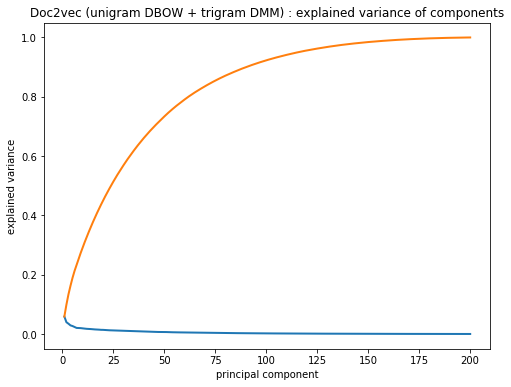

In [154]:
scaler = StandardScaler()
d2v_ugdbow_tgdmm_std = scaler.fit_transform(train_vecs_ugdbow_tgdmm)
d2v_ugdbow_tgdmm_std_val = scaler.fit_transform(validation_vecs_ugdbow_tgdmm)
d2v_pca = PCA().fit(d2v_ugdbow_tgdmm_std)
fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, d2v_pca.n_components_+1)

ax.plot(x_values, d2v_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(d2v_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Doc2vec (unigram DBOW + trigram DMM) : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

By looking at the graph above, even though the red line is not perfectly linear, but very close to a straight line. Is this good? No. This means each of the principal components contributes to the variance explanation almost equally, and there's not much point in reducing the dimensions based on PCA. This can also be seen from the blue line, which is very close to a straight line in the bottom.

Tf-Idf vectors showed a better result when the features are limited with Tfidf vectorizer in the first place than to reduce dimension afterwards, and doc2vec vectors seem to carry the roughly similar amount of information through its 200 dimension feature space.

In [137]:
#store in metrics dataframe
metrics_df = classifier_performance(tfidfvec2, train_data, test_data, y_test)
#add shallow learning metrics too 
metrics_df.to_csv('metrics_df.csv')

NameError: name 'classifier_performance' is not defined

# Feature Importance

In [12]:
def top_feature_extraction(vectorizer, num_features):
    unrelated_doc_matrix = vectorizer.transform(df[df.status == 0].text)
    related_doc_matrix = vectorizer.transform(df[df.status == 1].text)
    unrelated_tf = np.sum(unrelated_doc_matrix,axis=0)
    related_tf = np.sum(related_doc_matrix,axis=0)
    unrelated = np.squeeze(np.asarray(unrelated_tf))
    related = np.squeeze(np.asarray(related_tf))
    term_freq_df = pd.DataFrame([unrelated,related],columns=vectorizer.get_feature_names()).transpose()
    term_freq_df.columns = ['unrelated', 'related']
    term_freq_df['total'] = term_freq_df['unrelated'] + term_freq_df['related']
    display(term_freq_df.sort_values(by='total', ascending=False).iloc[:num_features])
    return term_freq_df

In [13]:
def plot_most_predictive_features(vectorizer):
    x_train = vectorizer.fit_transform(train_data)
    x_test = vectorizer.transform(test_data)
    chi2score = chi2(x_train, y_train)[0]

    plt.figure(figsize=(15,10))
    wscores = list(zip(vectorizer.get_feature_names(), chi2score))
    wchi2 = sorted(wscores, key=lambda x:x[1])
    topchi2 = list(zip(*wchi2[-20:]))
    x = range(len(topchi2[1]))
    labels = topchi2[0]
    plt.barh(x,topchi2[1], align='center', alpha=0.2)
    plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
    plt.yticks(x, labels)
    plt.xlabel('$\chi^2$')
    plt.title('Most predictive features and associated Chi-square scores')

# Exploratory Data Analysis

## Class Distribution

No handles with labels found to put in legend.


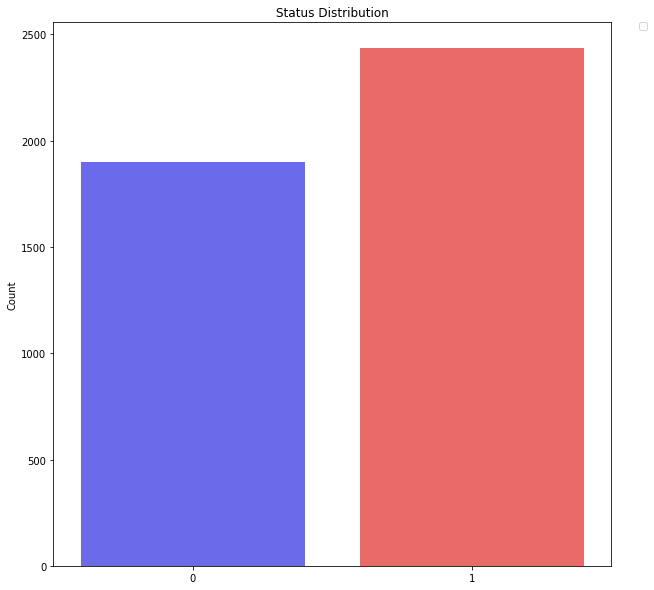

In [14]:
#distribution of annotated dataset (0/1)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x="status", data=df, palette='seismic')
ax.set_title('Status Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# In-Depth Classifier Performance

In [162]:
def print_metrics(model, x_test, y_test):
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print("Accuracy Score for model: {:.4}%".format(accuracy * 100))
    print("Precision Score for model: {:.4}%".format(precision * 100))
    print("Recall Score for model: {:.4}%".format(recall * 100))
    print("F1 Score for model: {:.4}%".format(f1 * 100))
    return accuracy, precision, recall, f1
    

def cm_plot(labels, predictions, normalize=False, cmap='Spectral'):
    cm = confusion_matrix(labels, predictions)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, ['POS', 'NEG'], ['POS', 'NEG'])
    sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap=cmap)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.colorbar()
    plt.show()

def plot_roc_curve(labels, predictions, y_score):
    fpr, tpr, thresholds = roc_curve(labels, y_score)
    print('AUC: {}'.format(auc(fpr, tpr)))
    #Seaborns Beautiful Styling
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [163]:
x_train = tfidfvec2.fit_transform(train_data)
x_test = tfidfvec2.transform(test_data)

## Naive Bayes

Accuracy Score for model: 71.89%
Precision Score for model: 69.69%
Recall Score for model: 86.41%
F1 Score for model: 77.15%


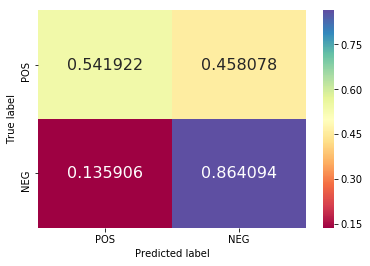

AUC: 0.7981979385405087


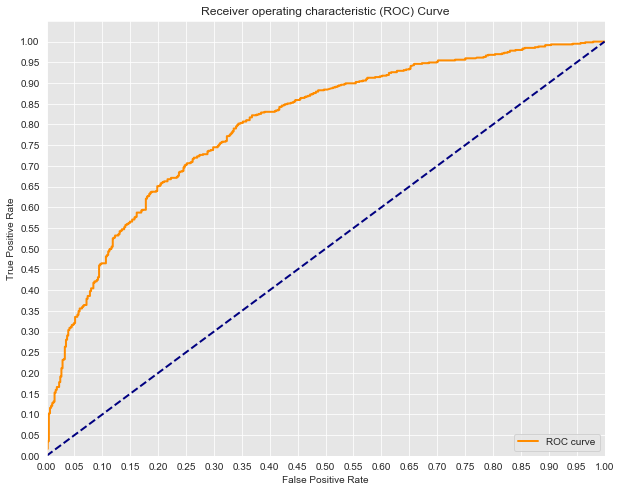

In [17]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
preds = nb.predict(x_test)
y_score = nb.predict_proba(x_test)

print_metrics(nb,x_test,y_test)
cm_plot(y_test,preds, normalize=True, cmap='Spectral')
plot_roc_curve(y_test,preds, y_score[:,1])

## Logistic Regression

### Hyperparameter Tuning

**L1 vs. L2 Regularization**

AUC for l1: 0.7702200079603628
AUC for l2: 0.7969798657718121


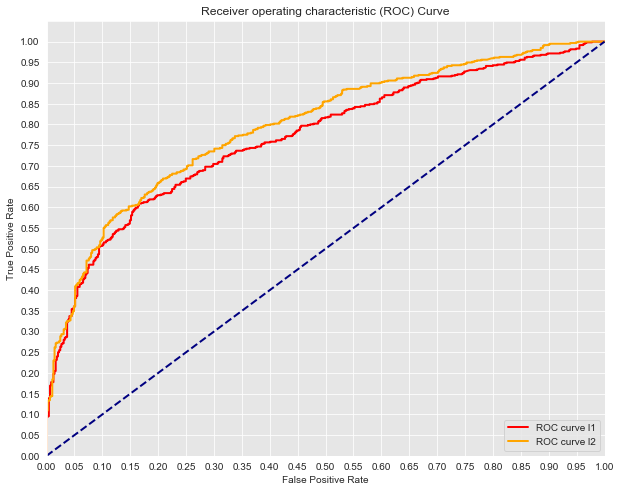

In [18]:
#compare L1 & L2 regularization
penalties = ['l1', 'l2']
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, pen in enumerate(penalties):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, penalty=pen) #Starter code
    model_log = logreg.fit(x_train, y_train)
    #Predict
    y_hat_test = logreg.predict(x_test)
    y_score = logreg.fit(x_train, y_train).decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(str(pen), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Class Weights**

AUC for balanced: 0.7945334266617257
AUC for None: 0.7969798657718121


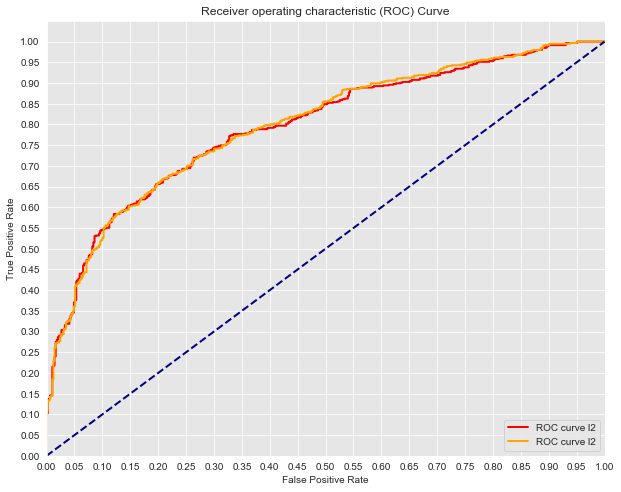

In [19]:
wgts = ['balanced', None]
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, wgt in enumerate(wgts):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, class_weight=wgt) #Starter code
    model_log = logreg.fit(x_train, y_train)
    #Predict
    y_hat_test = logreg.predict(x_test)
    y_score = logreg.fit(x_train, y_train).decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(str(wgt), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy Score for model: 71.89%
Precision Score for model: 73.8%
Recall Score for model: 79.13%
F1 Score for model: 76.37%


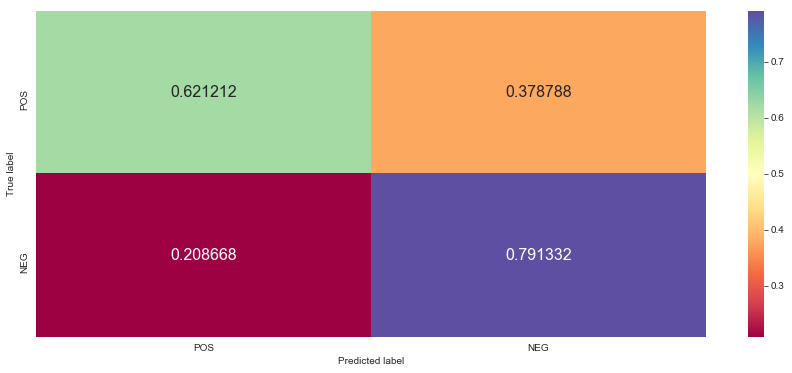

AUC: 0.7911898160694308


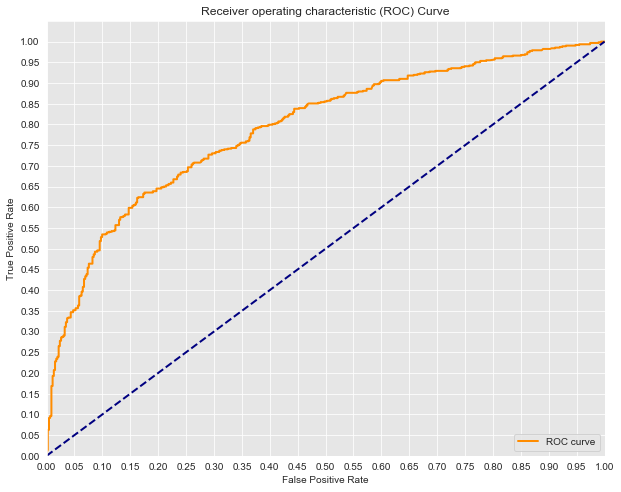

In [168]:
log = LogisticRegression()
log = log.fit(x_train, y_train)
preds = log.predict(x_test)
y_score = log.decision_function(x_test)

print_metrics(log,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score)

## Random Forest

Accuracy Score for model: 57.05%
Precision Score for model: 56.19%
Recall Score for model: 98.99%
F1 Score for model: 71.69%


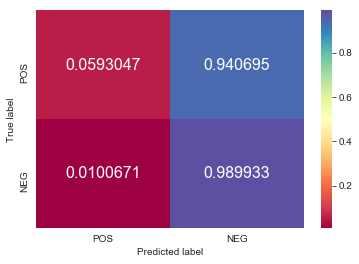

AUC: 0.7549031717928658


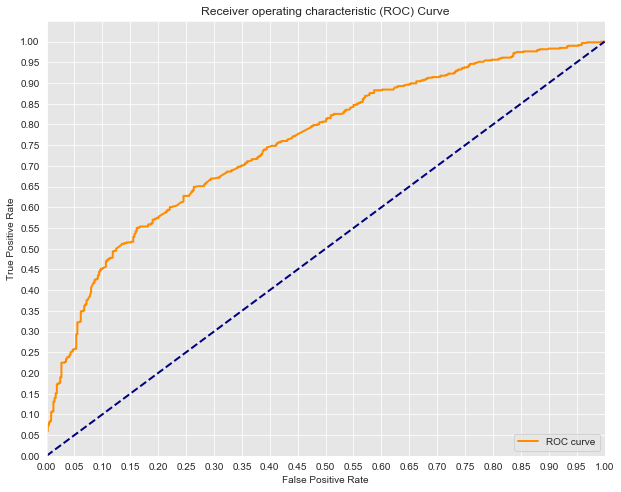

In [21]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(x_train, y_train)
preds = forest.predict(x_test)
y_score = forest.predict_proba(x_test)

print_metrics(forest,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Gradient Boost

Accuracy Score for model: 62.12%
Precision Score for model: 60.52%
Recall Score for model: 89.26%
F1 Score for model: 72.14%


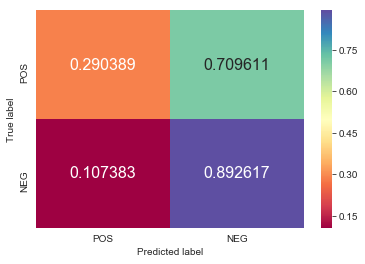

AUC: 0.7229930964439137


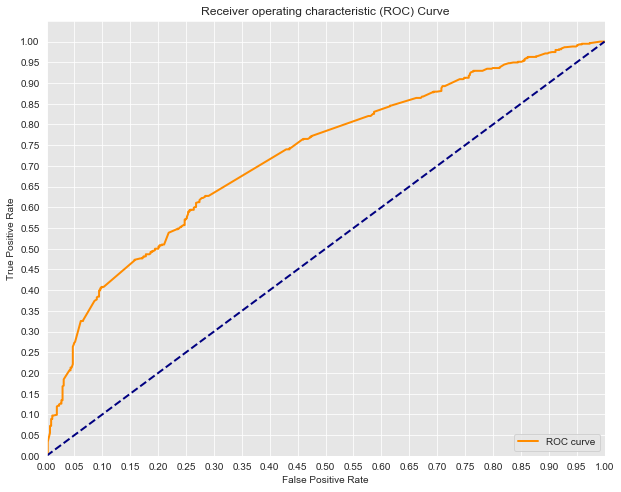

In [22]:
#adjust learning rate
gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01)
gradboost.fit(x_train, y_train)
preds = gradboost.predict(x_test)
y_score = gradboost.predict_proba(x_test)

print_metrics(gradboost,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Adaboost

Accuracy Score for model: 68.76%
Precision Score for model: 71.31%
Recall Score for model: 72.15%
F1 Score for model: 71.73%


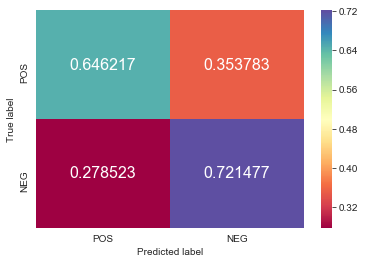

AUC: 0.7525802555550981


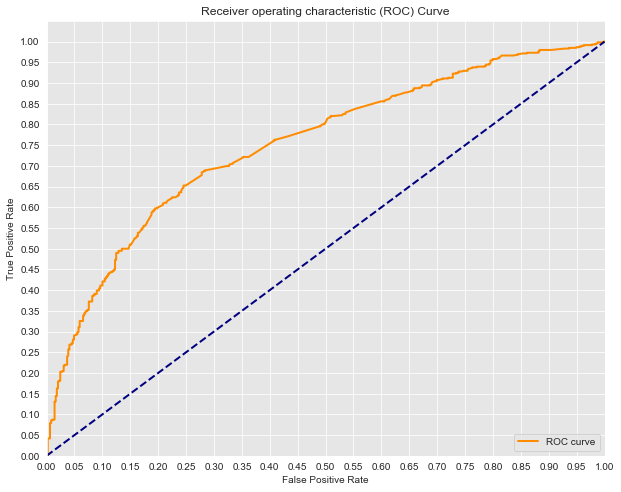

In [23]:
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(x_train, y_train)
preds = adaboost.predict(x_test)
y_score = adaboost.predict_proba(x_test)

print_metrics(adaboost,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Support Vector Machine

Accuracy Score for model: 71.8%
Precision Score for model: 73.62%
Recall Score for model: 75.84%
F1 Score for model: 74.71%


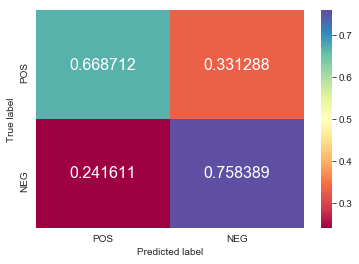

AUC: 0.7863054308889531


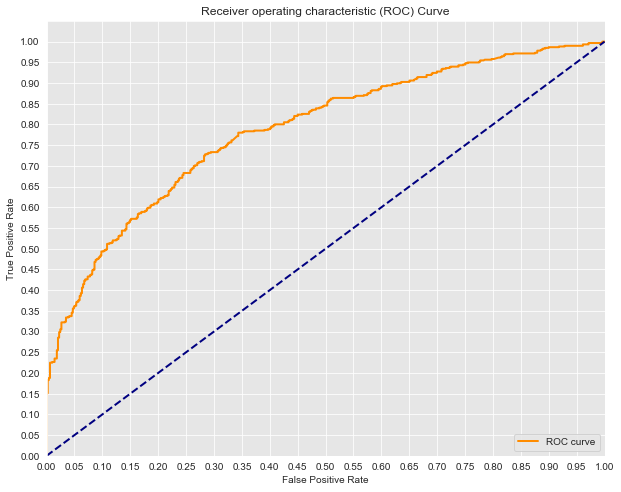

In [24]:
svm = SVC(kernel='linear', probability=True)
svm = svm.fit(x_train, y_train) 
preds = svm.predict(x_test)
y_score = svm.predict_proba(x_test)

print_metrics(svm,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds, y_score[:,1])

## Classifier Comparison

In [25]:
metrics_df = classifier_performance(tfidfvec2, train_data, test_data, y_test)

In [26]:
#roc curves

# Pickling Models

# Classifying 2016-2018 Tweets

Use TF-IDF bi-gram vectorization, logistic regression with default settings

In [178]:
data = df['text']
labels = df['status']
train_data, test_data, y_train, y_test = train_test_split(data, labels)
tfidfvec2 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2), max_features=20000)
x_train = tfidfvec2.fit_transform(train_data)
x_test = tfidfvec2.transform(test_data)

log = LogisticRegression()
log = log.fit(x_train, y_train)

In [173]:
twitter_df = pd.read_csv('2016_2018_tweets.csv')
twitter_df = twitter_df.drop('Unnamed: 0', axis=1)

,Tweet ID,DateTime,text
0,1044356219291332608,2018-09-24 18:41,please punish me for you having the flu
1,1044356218435907584,2018-09-24 18:41,that is extra scary when prof michelle barry a...
2,1044356171002515459,2018-09-24 18:41,got my flu shot today
3,1044356114966622208,2018-09-24 18:41,scientists verify elderberry beats the flu pre...
4,1044356046695923717,2018-09-24 18:40,thank you omg sorry you ve got the flu going o...


In [ ]:
twitter_df.head()

In [174]:
twitter_df.dropna(subset=['text'], inplace=True)

In [175]:
len(twitter_df)

3432451

In [179]:
#tfidf-bigram
data = twitter_df['text']
x = tfidfvec2.fit_transform(data)

In [180]:
classified_tweets = log.predict(x)

In [184]:
classified_tweets

array([1, 1, 1, ..., 1, 1, 1])

In [228]:
tweet_date = twitter_df[' DateTime']
tweet_ids = twitter_df['Tweet ID']

In [198]:
len(twitter_df)

3432451

In [229]:
classified_df = []
for i in range(len(twitter_df)):
    try:
        classified_df.append({'id': tweet_ids[i], 'text': data[i], 'status': classified_tweets[i], 'created': tweet_date[i]})
    except:
        continue

In [230]:
classified_tweets_df = pd.DataFrame(classified_df)

In [231]:
flu_tweets_df = classified_tweets_df[classified_tweets_df['status'].map(lambda x: x==1)]

In [ ]:
from langdetect import detect_langs

def english(string):
    res = detect_langs(string)
    for item in res:
        if item.lang == "en":
            return True

eng_flu_df = flu_tweets_df[flu_tweets_df['text'].map(lambda x: english(x))]

In [ ]:
len(eng_flu_df)

In [ ]:
eng_flu_df.head()

In [ ]:
#save as a csv

# Time Series Analysis

## Data Preparation

### CDC Data

In [2]:
def clean_df(df):
    df.reset_index(inplace=True) # Resets the index, makes factor a column
    df.drop('PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS',axis=1,inplace=True) # drop factor from axis 1 and make changes permanent by inplace=True
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df["Date"] = pd.to_datetime(df.WEEK.astype(str)+
                              df.YEAR.astype(str).add('-1') ,format='%W%Y-%w')
    df.set_index(df['Date'], inplace=True)
    df['ILITOTAL'] = df['ILITOTAL'].astype('int64')
    return df

In [3]:
cdc_16 = pd.read_csv('FluViewPhase2Data/16_17.csv')
cdc_17 = pd.read_csv('FluViewPhase2Data/17_18.csv')

cdc_16 = clean_df(cdc_16)
cdc_16 = cdc_16.drop(['AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
               'AGE 50-64', 'AGE 65', 'NUM. OF PROVIDERS', 'Date', 'YEAR','WEEK',  
              '%UNWEIGHTED ILI', 'TOTAL PATIENTS'], axis=1)
cdc_17 = clean_df(cdc_17)
cdc_17 = cdc_17.drop(['REGION TYPE', 'REGION', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
               'AGE 50-64', 'AGE 65', 'NUM. OF PROVIDERS', 'Date', 'YEAR','WEEK', '% WEIGHTED ILI', 
              '%UNWEIGHTED ILI'], axis=1)
cdc_df = pd.concat([cdc_16, cdc_17])

In [45]:
len(cdc_df)

102

### Twitter Data

In [ ]:
twitter_df = pd.read_csv('2016_2018_tweets.csv')

### Google Trends Data

In [4]:
google_df = pd.read_csv('google_trends/multiTimeline.csv')
google_df.reset_index(inplace=True) # Resets the index, makes factor a column
google_df.columns = google_df.iloc[0]
google_df = google_df.iloc[1:]
google_df.rename(columns={'Week': 'Date'}, inplace=True)
google_df.rename(columns={'flu: (United States)': 'Count'}, inplace=True)
google_df.set_index(google_df['Date'], inplace=True)
google_df.drop(['Date'], axis=1, inplace=True)
google_df['Count'] = google_df['Count'].astype('int64')

## Data Visualizations

### CDC Data

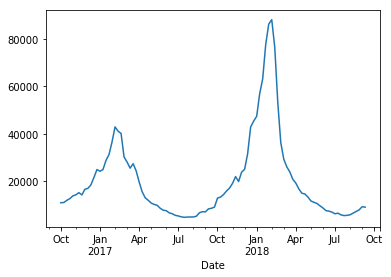

In [5]:
cdc_df.plot()
plt.legend().set_visible(False)
plt.show()

### Twitter Data

### Google Trends Data

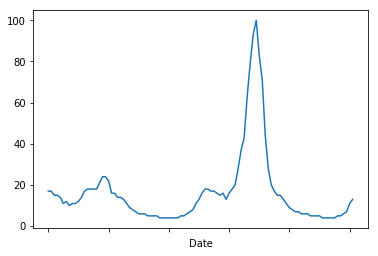

In [6]:
google_df.plot()
plt.legend().set_visible(False)
plt.show()

## Assessing Stationarity

In [7]:
#Plot rolling statistics
def check_stationarity(df,window,count):
    moving_avg = df.rolling(window).mean() #4 week lag
    moving_std = df.rolling(window).std()

    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(moving_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(count, autolag='AIC')

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
#mean and standard deviation increasing with time = not stationary

### Dickey-Fuller Test

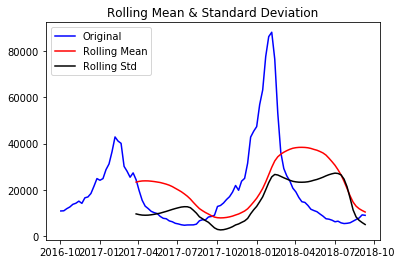

Results of Dickey-Fuller Test:
Test Statistic                 -2.843437
p-value                         0.052332
#Lags Used                      5.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [8]:
# Perform the dickey Fuller test 
cdc_df.dropna(inplace=True)
check_stationarity(cdc_df, 26, cdc_df['ILITOTAL'])
#null: time-series is non-stationary 
#p-value: 0.05
#p-value > 0.05, fail to reject null --> time-series is non-stationary at 95% confidence 

### Decomposition Visualization

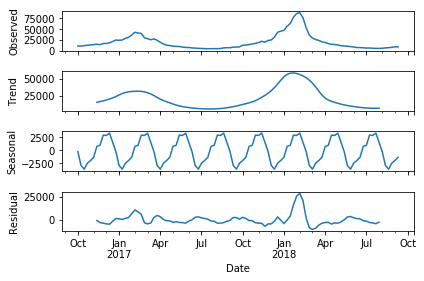

In [9]:
result = seasonal_decompose(cdc_df, freq=12) #every 4 weeks
result.plot()
plt.show()

## Stationarization of Data

### Seasonal Differencing

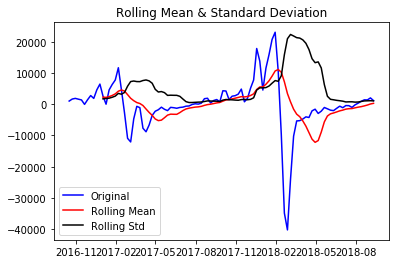

Results of Dickey-Fuller Test:
Test Statistic                 -2.834899
p-value                         0.053459
#Lags Used                      8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [23]:
cdc_seasonal_diff= cdc_df - cdc_df.shift(12)
cdc_seasonal_diff.dropna(inplace=True)
check_stationarity(cdc_seasonal_diff, 12, cdc_seasonal_diff['ILITOTAL'])
#p-value: 0.002264 -- stationary data 

## ACF & PACF Visualizations

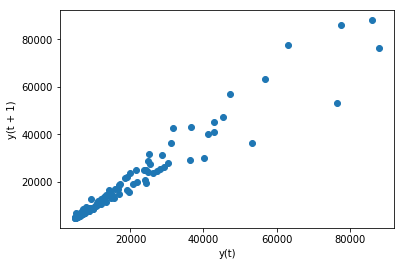

In [11]:
#plot the observation at the previous time step 
#(t-1) with the observation at the next time step (t+1) as a scatter plot.
#plots the visits(t) on the x-axis against 
#the visits on the previous day (t-1) on the y-axis.
lag_plot(cdc_df)
#clear correlation

### Pearson Correlation

In [12]:
# creates a lagged version of the dataset and calculates a 
#correlation matrix of each column with other columns, including itself.
values = cdc_df['ILITOTAL']
dataframe = concat([values.shift(2), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)
#strong positive correlation (0.89) between the observation and the lag=2 value.

          t-1       t+1
t-1  1.000000  0.892759
t+1  0.892759  1.000000


### Autocorrelation Plot

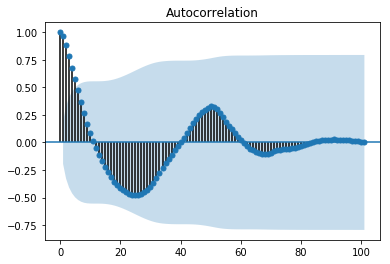

In [13]:
plot_acf(cdc_df)
plt.show()

### PACF Chart for Seasonal Differences

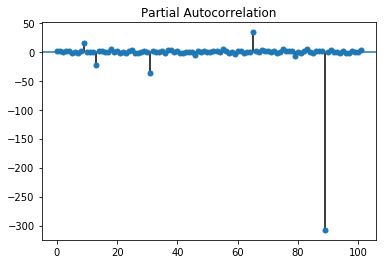

In [14]:
plot_pacf(cdc_df)
plt.show()

Use PACF for AR model diagnostics and ACF for MA model diagnostics

# ARIMA Modeling

## Seasonal ARIMA Model, CDC Data Only

### Hyperparameter Selection

In [ ]:
#https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
#add grid search 
def sarimax_grid_search():
    # Define the p, d and q parameters to take any value between 0 and 2
    p = [0, 1, 2, 4, 6, 8, 10]
    d = range(0, 3)
    q = range(0, 3)
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(cdc_df['ILITOTAL'],
                                                order=comb,
                                                seasonal_order=combs)
                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    return ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
sarimax_grid_search()

In [61]:
mod = sm.tsa.statespace.SARIMAX(cdc_df['ILITOTAL'], order=(1,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                           ILITOTAL   No. Observations:                  102
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -857.123
Date:                            Sun, 30 Sep 2018   AIC                           1722.245
Time:                                    12:59:20   BIC                           1732.200
Sample:                                10-03-2016   HQIC                          1726.258
                                     - 09-10-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7004      0.068     10.279      0.000       0.567       0.834
ar.S.L12      -0.0068      0.166   

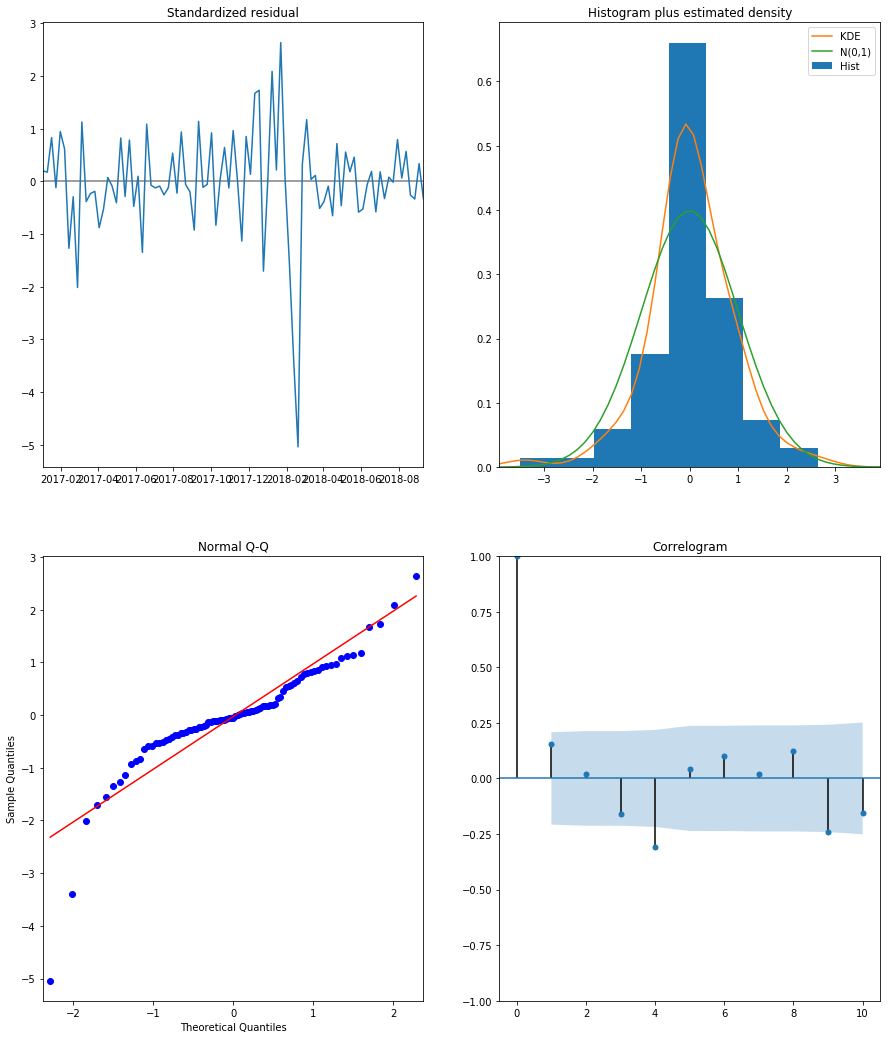

In [62]:
results.plot_diagnostics(figsize=(15, 18))
plt.show()

* KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

## Model Validation

### One-Step Ahead Forecasting
Compare predicted values to real values in the time series

In [63]:
def forecasting(results, dynamic=False):
    # get predictions 
    pred = results.get_prediction(start=pd.to_datetime('2017-01-02'), dynamic=dynamic)
    pred_conf = pred.conf_int()
    # Plot real vs predicted values along with confidence interval
    rcParams['figure.figsize'] = 15, 6

    #Plot observed values
    ax = cdc_df['2016':].plot(label='observed')
    #Plot predicted values
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)
    #Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=.5)
    #Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('ILI-visits')
    plt.legend()
    plt.show()
    # Get the Real and predicted values
    visits_forecasted = pred.predicted_mean
    visits_truth = cdc_df['2017-01-02':]['ILITOTAL']
    # Compute the mean square error
    mse = np.sqrt(((visits_forecasted - visits_truth) ** 2).mean())
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

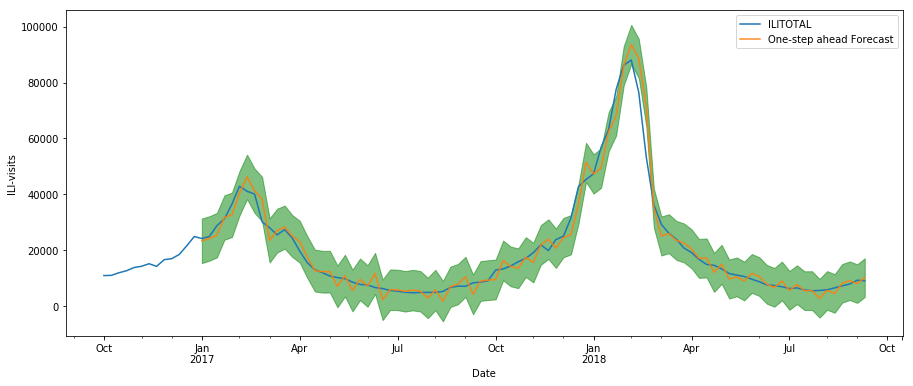

The Root Mean Squared Error of our forecasts is 3651.55


In [64]:
forecasting(results, dynamic=False)

### Dynamic Forecasting
Only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

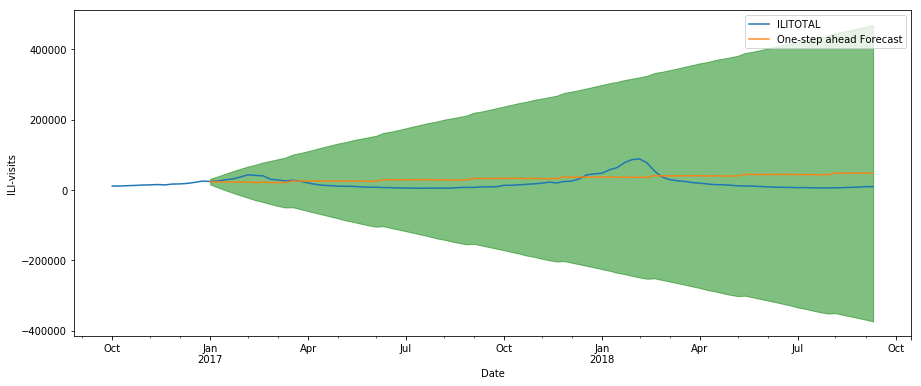

The Root Mean Squared Error of our forecasts is 24821.22


In [65]:
forecasting(results,dynamic=True)

In [66]:
def get_forecast(steps):
    # Get forecast 500 steps ahead in future
    prediction = results.get_forecast(steps=steps)
    # Get confidence intervals of forecasts
    pred_conf = prediction.conf_int()
    # Plot future predictions with confidence intervals
    ax = cdc_df.plot(label='observed', figsize=(20, 15))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('ILI visits')

    plt.legend()
    plt.show()

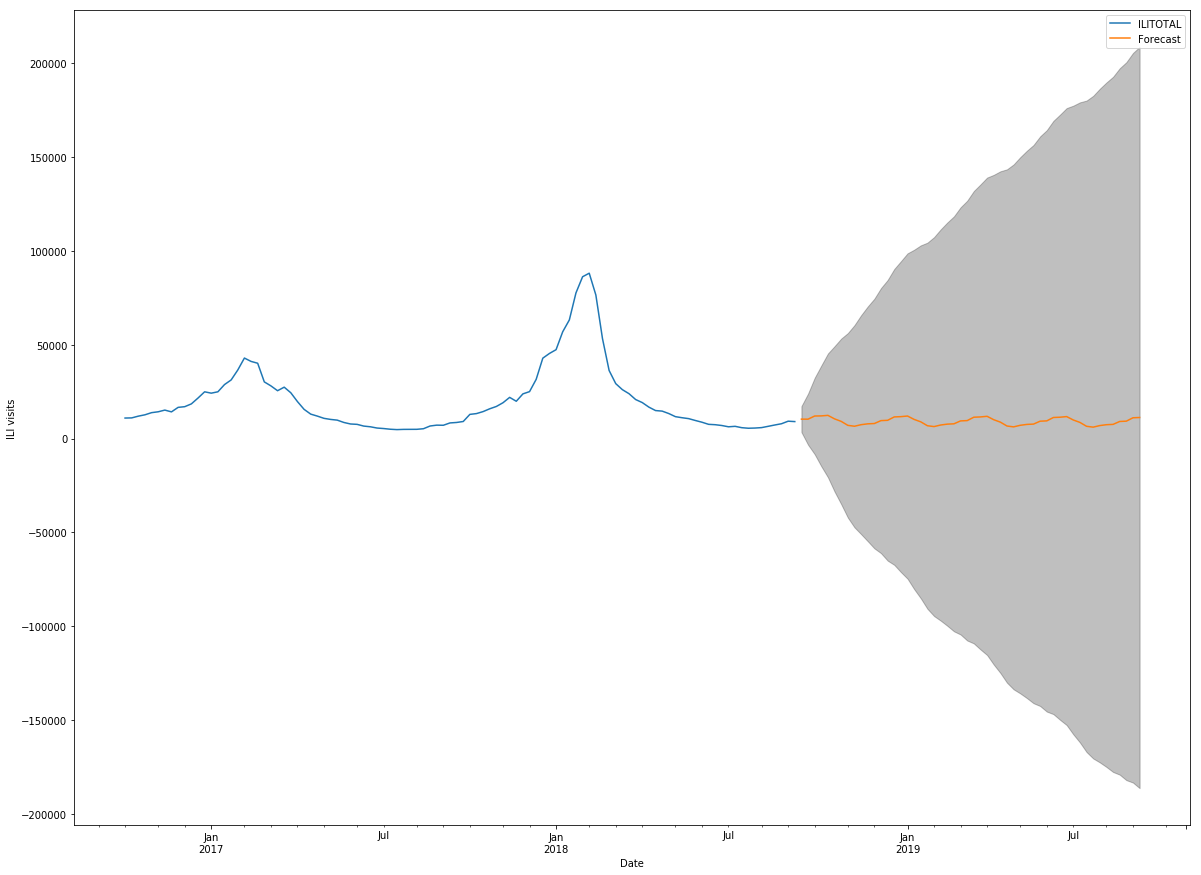

In [68]:
get_forecast(52)

# Next Steps:
* Time-series analysis with CDC, Twitter, and Google Trends data to assess which model is best at forecasting outbreaks, using CDC data as 'ground truth' and AIC as a metric
* Add more annotated tweets
* Dashboard visualizations